# Creating Violin Plots for MMA Fight Analysis
## A Tutorial for Sports Science Data Visualisation

### Using This Notebook

**Running the code:**
1. **Code cells**: Click on grey boxes and press `Shift + Enter` or click the play button (▶️)
2. **Order matters**: Run cells from top to bottom - each cell builds on previous ones
3. **Text cells**: White boxes contain explanations - no need to run these
4. **Saving your work**: 
   - **Google Colab**: File → Save a copy in Drive (creates your own editable version)
   - **Jupyter**: File → Download as → Notebook (.ipynb)

---

## About This Tutorial

This tutorial recreates the violin plots from Barley et al. (2025) studying the influence of height and reach on fight-ending punches in the UFC. You'll learn to:

- Generate realistic MMA fighter data
- Create violin plots with box plot overlays
- Understand the statistical patterns in the visualisations
- Apply these techniques to sports science data

### Target Visualisation

![Figure 1 from Barley et al. (2025)](https://raw.githubusercontent.com/hareshsuppiah/Sport-Science-Snag-Coding-Tutorials/main/MMA-Violin-Plots/SCR-20250608-ivum.png)

### Understanding Violin Plots

Violin plots combine box plots and density plots, showing:
- **Distribution shape** (the violin curve)
- **Median and quartiles** (inner box plot)
- **Individual data points** (dots)
- **Sample size** (labelled on x-axis)

We examine how height and reach differences between fighters affect success with different punch types (hooks, overhand, straight, uppercut).

## Step 1: Installing and Importing Libraries

Let's start by importing the Python libraries we'll need. Run this cell first!

In [1]:
# Import necessary libraries for data analysis and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducible results
np.random.seed(42)

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully")
print("Ready to create violin plots.")

Libraries imported successfully
Ready to create violin plots.


## Step 2: Understanding Our Data

Before we create the data, let's understand what we're measuring:

### Key Variables:
- **Height Difference**: Winner's height minus loser's height (cm)
- **Reach Difference**: Winner's reach minus loser's reach (cm)
- **Combined Difference**: Height + Reach difference (cm)
- **Punch Type**: Hook, Overhand, Straight, Uppercut

### What the Numbers Mean:
- **Positive values**: Winner was taller/had longer reach
- **Negative values**: Winner was shorter/had shorter reach
- **Zero**: Both fighters were equal in that dimension

This helps determine whether physical advantages translate to fighting success.

## Step 3: Generating Realistic MMA Data

We'll create pseudo data matching the patterns from the original study, based on typical MMA fighter measurements and fight outcomes.

### Why Are We Creating Fake Data?

Before we start coding, let's understand why we're generating synthetic data instead of using real fight data:

**🔒 Data Privacy**: Real UFC fight data is proprietary and not freely available
**📊 Educational Purpose**: We can create data that perfectly demonstrates the concepts we want to teach
**🎯 Controlled Learning**: Our fake data will show clear patterns that are easy to interpret
**📈 Reproducible Results**: Everyone running this code will get the same results

**What Makes Our Data "Realistic"?**
- Based on actual MMA fighter measurements (height 5'6" to 6'5", reach 65" to 80")
- Uses real fight outcome patterns from published research
- Includes realistic sample sizes for each punch type
- Models the statistical relationships found in real studies

Don't worry - the techniques you learn here work exactly the same with real data!

In [2]:
# Let's start creating our MMA fight data!
# We'll build this step by step so you can see what's happening

print("🥊 Starting to create MMA fight data...")
print("We'll make fake data that looks like real MMA fight results")
print("")

# STEP 1: Decide how many fights we want for each punch type
# (These numbers come from the real research study we're copying)
hook_fights = 136        # Most common punch type
overhand_fights = 14     # Less common  
straight_fights = 89     # Pretty common
uppercut_fights = 23     # Less common

# Let's see what we're planning to create
total_fights = hook_fights + overhand_fights + straight_fights + uppercut_fights
print(f"📊 Planning to create data for {total_fights} total fights:")
print(f"   • Hook punches: {hook_fights} fights")
print(f"   • Overhand punches: {overhand_fights} fights") 
print(f"   • Straight punches: {straight_fights} fights")
print(f"   • Uppercut punches: {uppercut_fights} fights")
print("")
print("✅ Planning complete! Now let's create our data storage...")

🥊 Starting to create MMA fight data...
We'll make fake data that looks like real MMA fight results

📊 Planning to create data for 262 total fights:
   • Hook punches: 136 fights
   • Overhand punches: 14 fights
   • Straight punches: 89 fights
   • Uppercut punches: 23 fights

✅ Planning complete! Now let's create our data storage...


### Understanding Random Number Generation

The next few code chunks will create realistic fight data using Python's random number generators. Here's what you need to know:

**🎲 What is `np.random.normal(center, spread)`?**
- Creates random numbers that follow a "bell curve" pattern
- `center` = the average value we want
- `spread` = how much variation around the average

**🎯 Example**: `np.random.normal(0, 8)` creates numbers:
- Centered around 0 (no height advantage on average)
- Most numbers between -16 and +16 cm
- Occasionally some extreme values (very tall vs very short)

**🥊 Why Different Numbers for Each Punch Type?**
- **Hook punches**: Center = 0 (height doesn't matter much)
- **Overhand punches**: Center = negative (shorter fighters win more)
- **Straight punches**: Center = positive (taller fighters win more)
- **Uppercut punches**: Center = negative (shorter fighters win more)

This creates realistic patterns that match what we see in real MMA fights!

In [3]:
# STEP 2: Create empty lists to store our data
# Think of these as empty columns in a future spreadsheet

print("📋 Creating empty storage lists...")
print("These will hold all our fight data:")
print("")

# Create 4 empty lists - one for each type of information we want to track
all_punch_types = []          # Will store: "Hook", "Hook", "Overhand", etc.
all_height_differences = []   # Will store: 5.2, -3.1, 0.8, etc. (in cm)
all_reach_differences = []    # Will store: 7.4, -2.5, 1.2, etc. (in cm)  
all_combined_differences = [] # Will store: height + reach differences

print("✅ Created 4 empty lists:")
print(f"   • all_punch_types: {len(all_punch_types)} items (empty for now)")
print(f"   • all_height_differences: {len(all_height_differences)} items (empty for now)")
print(f"   • all_reach_differences: {len(all_reach_differences)} items (empty for now)")
print(f"   • all_combined_differences: {len(all_combined_differences)} items (empty for now)")
print("")
print("🎯 Next: We'll fill these lists with fight data for each punch type!")


📋 Creating empty storage lists...
These will hold all our fight data:

✅ Created 4 empty lists:
   • all_punch_types: 0 items (empty for now)
   • all_height_differences: 0 items (empty for now)
   • all_reach_differences: 0 items (empty for now)
   • all_combined_differences: 0 items (empty for now)

🎯 Next: We'll fill these lists with fight data for each punch type!


In [4]:
# STEP 3: Create data for HOOK punches
# Hook punches are fairly balanced - height/reach don't matter much

print("🪝 Creating data for HOOK punches...")
print(f"Goal: Create {hook_fights} hook punch fights")
print("")
print("About hook punches:")
print("• Thrown from the side (like a big sideways swing)")
print("• Don't rely much on reach advantage") 
print("• Both tall and short fighters can use them effectively")
print("")

# Create hook punch data using a loop
print("Creating each fight one by one...")
for fight_number in range(hook_fights):
    # Add this punch type to our list
    all_punch_types.append('Hook')
    
    # Create a height difference for this fight
    # np.random.normal(center, spread) creates random numbers
    # center=0 means no average advantage for tall or short fighters
    # spread=8 means most differences will be between -16cm and +16cm
    height_diff = np.random.normal(0, 8) 
    
    # Create a reach difference (slightly favors longer reach on average)
    reach_diff = np.random.normal(0.28, 12)
    
    # Combined difference = height + reach + some extra randomness
    combined_diff = height_diff + reach_diff + np.random.normal(0.4, 15)
    
    # Store all our numbers in the lists
    all_height_differences.append(height_diff)
    all_reach_differences.append(reach_diff)
    all_combined_differences.append(combined_diff)

print(f"✅ Created {hook_fights} hook punch fights!")
print(f"Our lists now have {len(all_punch_types)} total fights")
print("")
print("Let's check a few examples:")
print(f"• Fight 1: Height diff = {all_height_differences[0]:.1f}cm, Reach diff = {all_reach_differences[0]:.1f}cm")
print(f"• Fight 2: Height diff = {all_height_differences[1]:.1f}cm, Reach diff = {all_reach_differences[1]:.1f}cm")
print(f"• Fight 3: Height diff = {all_height_differences[2]:.1f}cm, Reach diff = {all_reach_differences[2]:.1f}cm")


🪝 Creating data for HOOK punches...
Goal: Create 136 hook punch fights

About hook punches:
• Thrown from the side (like a big sideways swing)
• Don't rely much on reach advantage
• Both tall and short fighters can use them effectively

Creating each fight one by one...
✅ Created 136 hook punch fights!
Our lists now have 136 total fights

Let's check a few examples:
• Fight 1: Height diff = 4.0cm, Reach diff = -1.4cm
• Fight 2: Height diff = 12.2cm, Reach diff = -2.5cm
• Fight 3: Height diff = 12.6cm, Reach diff = 9.5cm


### What We Just Created: Understanding the Patterns

Now that we've generated data for all 4 punch types, let's understand what we just created:

**🪝 Hook Punches (Balanced Pattern)**
- Numbers centered around 0
- Both positive and negative values common
- **Real-world meaning**: Height/reach advantages matter less for hooks

**⬇️ Overhand Punches (Shorter Fighter Advantage)**  
- More negative numbers (shorter fighters winning)
- **Real-world meaning**: Shorter fighters can duck and counter with overhand punches

**➡️ Straight Punches (Taller Fighter Advantage)**
- More positive numbers (taller fighters winning)  
- **Real-world meaning**: Longer reach = can hit without being hit back

**⬆️ Uppercut Punches (Shorter Fighter Advantage)**
- More negative numbers (shorter fighters winning)
- **Real-world meaning**: Uppercuts are thrown upward - easier for shorter fighters

**🔄 Why Use Loops?**
Each `for` loop creates many individual fights with similar patterns but natural variation, just like in real sports data.

**📊 What's Next?**
Now we'll convert our separate lists into one organized data table that's easy to work with!

In [5]:
# STEP 4: Create data for OVERHAND punches
# Shorter fighters tend to do better with overhand punches

print("⬇️ Creating data for OVERHAND punches...")
print(f"Goal: Create {overhand_fights} overhand punch fights")
print("")
print("About overhand punches:")
print("• Thrown in a downward arc (like throwing a baseball)")
print("• Shorter fighters can duck under and throw them more easily")
print("• Taller fighters have trouble defending against them")
print("")

# Create overhand punch data - shorter fighters should win more often
print("Creating overhand punch fights...")
current_position = len(all_punch_types)  # Remember where we started

for fight_number in range(overhand_fights):
    all_punch_types.append('Overhand')
    
    # NEGATIVE numbers = shorter fighter won more often
    # This represents the pattern we see in real MMA
    height_diff = np.random.normal(-4, 5)      # Average -4cm (shorter fighters win)
    reach_diff = np.random.normal(-5.43, 8)    # Average -5.43cm (shorter reach wins)
    combined_diff = height_diff + reach_diff + np.random.normal(-7.93, 12)
    
    # Store the data
    all_height_differences.append(height_diff)
    all_reach_differences.append(reach_diff)
    all_combined_differences.append(combined_diff)

print(f"✅ Created {overhand_fights} overhand punch fights!")
print(f"Our lists now have {len(all_punch_types)} total fights")
print("")
print("Notice the pattern - negative numbers mean shorter fighters win more:")
for i in range(3):
    fight_index = current_position + i
    print(f"• Overhand fight {i+1}: Height diff = {all_height_differences[fight_index]:.1f}cm, Reach diff = {all_reach_differences[fight_index]:.1f}cm")
print("")
print("🎯 Negative numbers = shorter/shorter-reach fighter won that fight!")


⬇️ Creating data for OVERHAND punches...
Goal: Create 14 overhand punch fights

About overhand punches:
• Thrown in a downward arc (like throwing a baseball)
• Shorter fighters can duck under and throw them more easily
• Taller fighters have trouble defending against them

Creating overhand punch fights...
✅ Created 14 overhand punch fights!
Our lists now have 150 total fights

Notice the pattern - negative numbers mean shorter fighters win more:
• Overhand fight 1: Height diff = -3.4cm, Reach diff = -1.3cm
• Overhand fight 2: Height diff = -9.6cm, Reach diff = -17.7cm
• Overhand fight 3: Height diff = -2.3cm, Reach diff = -11.4cm

🎯 Negative numbers = shorter/shorter-reach fighter won that fight!


In [6]:
# STEP 5: Create data for STRAIGHT punches
# Taller fighters with longer reach should do better

print("➡️ Creating data for STRAIGHT punches...")
print(f"Goal: Create {straight_fights} straight punch fights") 
print("")
print("About straight punches:")
print("• Thrown directly forward (like a piston)")
print("• Longer reach = big advantage")
print("• Taller fighters can hit without being hit back")
print("")

# Create straight punch data - taller fighters should win more often
print("Creating straight punch fights...")
current_position = len(all_punch_types)  # Track where we are in our lists

for fight_number in range(straight_fights):
    all_punch_types.append('Straight')
    
    # POSITIVE numbers = taller fighter won more often
    # This shows reach advantage in action
    height_diff = np.random.normal(3, 12)       # Average +3cm (taller fighters win)
    reach_diff = np.random.normal(1.63, 13)     # Average +1.63cm (longer reach wins)
    combined_diff = height_diff + reach_diff + np.random.normal(3.62, 18)
    
    # Store the data
    all_height_differences.append(height_diff)
    all_reach_differences.append(reach_diff)
    all_combined_differences.append(combined_diff)

print(f"✅ Created {straight_fights} straight punch fights!")
print(f"Our lists now have {len(all_punch_types)} total fights")
print("")
print("Notice the pattern - positive numbers mean taller fighters win more:")
for i in range(3):
    fight_index = current_position + i
    print(f"• Straight fight {i+1}: Height diff = {all_height_differences[fight_index]:.1f}cm, Reach diff = {all_reach_differences[fight_index]:.1f}cm")
print("")
print("🎯 Positive numbers = taller/longer-reach fighter won that fight!")


➡️ Creating data for STRAIGHT punches...
Goal: Create 89 straight punch fights

About straight punches:
• Thrown directly forward (like a piston)
• Longer reach = big advantage
• Taller fighters can hit without being hit back

Creating straight punch fights...
✅ Created 89 straight punch fights!
Our lists now have 239 total fights

Notice the pattern - positive numbers mean taller fighters win more:
• Straight fight 1: Height diff = 2.2cm, Reach diff = 14.0cm
• Straight fight 2: Height diff = 9.0cm, Reach diff = -5.3cm
• Straight fight 3: Height diff = 1.7cm, Reach diff = -11.8cm

🎯 Positive numbers = taller/longer-reach fighter won that fight!


### From Lists to Data Table: Why This Matters

**🗂️ What is a DataFrame?**
Think of a DataFrame as a digital spreadsheet with:
- **Rows** = individual fights  
- **Columns** = different measurements (punch type, height difference, etc.)
- **Labels** = meaningful names for each column

**🔄 Why Convert Our Lists?**
1. **Easier Analysis**: Can filter, sort, and calculate statistics easily
2. **Better Organization**: All related data stays together  
3. **Plotting Ready**: Visualization tools work better with DataFrames
4. **Industry Standard**: Most data science work uses this format

**📊 What We're Creating:**
```
| punch_type | height_diff | reach_diff | combined_diff |
|------------|-------------|------------|---------------|
| Hook       | 2.3         | -1.2       | 1.1           |
| Hook       | -5.7        | 8.4        | 2.7           |
| Overhand   | -3.1        | -4.2       | -7.3          |
```

Each row represents one fight with all its measurements in one place!

In [7]:
# STEP 6: Create data for UPPERCUT punches  
# Shorter fighters should do better with uppercuts

print("⬆️ Creating data for UPPERCUT punches...")
print(f"Goal: Create {uppercut_fights} uppercut punch fights")
print("")
print("About uppercut punches:")
print("• Thrown upward from below (like an upward hook)")
print("• Shorter fighters punch upward more naturally")
print("• Harder for taller fighters to generate upward power")
print("")

# Create uppercut punch data - shorter fighters should win more often
print("Creating uppercut punch fights...")
current_position = len(all_punch_types)  # Track our position

for fight_number in range(uppercut_fights):
    all_punch_types.append('Uppercut')
    
    # NEGATIVE numbers = shorter fighter won more often  
    # Uppercuts favor the shorter fighter
    height_diff = np.random.normal(-4, 8)       # Average -4cm (shorter fighters win)
    reach_diff = np.random.normal(-1.74, 10)    # Average -1.74cm (shorter reach wins)
    combined_diff = height_diff + reach_diff + np.random.normal(-4.13, 16)
    
    # Store the data
    all_height_differences.append(height_diff)
    all_reach_differences.append(reach_diff)
    all_combined_differences.append(combined_diff)

print(f"✅ Created {uppercut_fights} uppercut punch fights!")
print(f"Our lists now have {len(all_punch_types)} total fights")
print("")
print("Notice the pattern - negative numbers mean shorter fighters win more:")
for i in range(3):
    fight_index = current_position + i
    print(f"• Uppercut fight {i+1}: Height diff = {all_height_differences[fight_index]:.1f}cm, Reach diff = {all_reach_differences[fight_index]:.1f}cm")
print("")
print("🎯 Negative numbers = shorter/shorter-reach fighter won that fight!")
print("")
print("📊 DATA GENERATION COMPLETE!")
print(f"Total fights created: {len(all_punch_types)}")


⬆️ Creating data for UPPERCUT punches...
Goal: Create 23 uppercut punch fights

About uppercut punches:
• Thrown upward from below (like an upward hook)
• Shorter fighters punch upward more naturally
• Harder for taller fighters to generate upward power

Creating uppercut punch fights...
✅ Created 23 uppercut punch fights!
Our lists now have 262 total fights

Notice the pattern - negative numbers mean shorter fighters win more:
• Uppercut fight 1: Height diff = -2.8cm, Reach diff = -5.4cm
• Uppercut fight 2: Height diff = -1.5cm, Reach diff = -18.8cm
• Uppercut fight 3: Height diff = 1.9cm, Reach diff = -0.0cm

🎯 Negative numbers = shorter/shorter-reach fighter won that fight!

📊 DATA GENERATION COMPLETE!
Total fights created: 262


In [8]:
# STEP 7: Turn our lists into a data table (DataFrame)
# This is like creating a spreadsheet from our lists

print("📊 Creating our data table...")
print("Converting our 4 lists into one organized table")
print("")

# Create a DataFrame - think of this as a spreadsheet with labeled columns
mma_data = pd.DataFrame({
    'punch_type': all_punch_types,               # Column 1: Hook, Overhand, etc.
    'height_difference': all_height_differences, # Column 2: Winner height - Loser height  
    'reach_difference': all_reach_differences,   # Column 3: Winner reach - Loser reach
    'combined_difference': all_combined_differences # Column 4: Height + Reach combined
})

print("✅ Data table created successfully!")
print("")
print("📈 Summary of our MMA fight dataset:")
print(f"   • Total fights: {len(mma_data)}")
print(f"   • Columns: {list(mma_data.columns)}")
print("")

print("🥊 Fights by punch type:")
fight_counts = mma_data['punch_type'].value_counts().sort_index()
for punch_type, count in fight_counts.items():
    print(f"   • {punch_type}: {count} fights")
print("")

print("👀 First 5 rows of our data table:")
print(mma_data.head())
print("")
print("🎯 Perfect! Our data is now ready for analysis and plotting!")


📊 Creating our data table...
Converting our 4 lists into one organized table

✅ Data table created successfully!

📈 Summary of our MMA fight dataset:
   • Total fights: 262
   • Columns: ['punch_type', 'height_difference', 'reach_difference', 'combined_difference']

🥊 Fights by punch type:
   • Hook: 136 fights
   • Overhand: 14 fights
   • Straight: 89 fights
   • Uppercut: 23 fights

👀 First 5 rows of our data table:
  punch_type  height_difference  reach_difference  combined_difference
0       Hook           3.973713         -1.379172            12.709870
1       Hook          12.184239         -2.529840             6.542344
2       Hook          12.633703          9.489217            15.480803
3       Hook           4.340480         -5.281012            -7.526478
4       Hook           1.935698        -22.679363           -46.217432

🎯 Perfect! Our data is now ready for analysis and plotting!


### Why Explore Data Before Plotting?

**🔍 Data Exploration is Critical Because:**
1. **Verify Our Patterns**: Check that our data generation worked correctly
2. **Understand Scale**: Know the range of values we're working with  
3. **Spot Issues**: Find any unusual values or problems
4. **Interpret Results**: Numbers help us explain what the plots show

**📊 What We Just Discovered:**
- **Hook punches**: Balanced (medians near 0) - no clear height advantage
- **Overhand/Uppercut punches**: Negative medians - shorter fighters win more  
- **Straight punches**: Positive medians - taller fighters win more

**🎯 These patterns will be clearly visible in our violin plots!**

**What's Coming Next:**
We'll create 3 violin plots that visually show these same patterns:
1. **Height Differences** - How height affects each punch type
2. **Reach Differences** - How reach affects each punch type  
3. **Combined Differences** - Height + reach effects combined

The numbers we just calculated will appear as labels on our plots!

## Step 4: Exploring Our Data

Calculate basic statistics to understand the data before creating visualisations.

### Setting Up Our Plotting Workspace

**🎨 Why 3 Separate Plots?**
We need 3 different violin plots because we're measuring 3 different things:
1. **Height differences** between winners and losers
2. **Reach differences** between winners and losers  
3. **Combined differences** (height + reach together)

**📐 Understanding `plt.subplots(3, 1, figsize=(12, 16))`:**
- `3, 1` = 3 plots arranged vertically (3 rows, 1 column)
- `figsize=(12, 16)` = 12 inches wide, 16 inches tall
- Creates 3 empty "canvases" we can draw on

**🗂️ What Are We Organizing?**
Each plot will show the same 4 punch types (Hook, Overhand, Straight, Uppercut) but measuring different physical attributes. This lets us compare:
- **Across punch types**: How does each technique favor different body types?
- **Across measurements**: Does height matter more than reach for certain punches?

**🎯 Next Step:** We'll build each plot piece by piece so you can see exactly how violin plots are constructed!

In [9]:
# Let's explore our data to understand the patterns
# This will help us interpret our violin plots later

print("🔍 Exploring our MMA fight data...")
print("")
print("Remember what the numbers mean:")
print("• POSITIVE numbers = Winner was TALLER/had LONGER reach than loser")
print("• NEGATIVE numbers = Winner was SHORTER/had SHORTER reach than loser") 
print("• Numbers close to ZERO = Winners and losers were similar sizes")
print("")

# Look at each type of measurement separately
measurements_to_check = [
    ('height_difference', 'Height Differences'),
    ('reach_difference', 'Reach Differences'), 
    ('combined_difference', 'Combined Differences (Height + Reach)')
]

for measurement_name, measurement_title in measurements_to_check:
    print("=" * 60)
    print(f"📊 {measurement_title}")
    print("=" * 60)
    
    # Look at each punch type one by one
    punch_types = ['Hook', 'Overhand', 'Straight', 'Uppercut']
    
    for punch_type in punch_types:
        # Get all the data for this punch type and measurement
        # This is like filtering a spreadsheet to show only certain rows
        data_for_this_punch = mma_data[mma_data['punch_type'] == punch_type][measurement_name]
        
        # Calculate some basic statistics (simple math on our numbers)
        median_value = data_for_this_punch.median()  # The middle number when sorted
        average_value = data_for_this_punch.mean()   # Add all numbers and divide by count
        number_of_fights = len(data_for_this_punch)  # How many fights we have
        
        # Show the results in a nice format
        print(f"{punch_type:>10} punches ({number_of_fights:>3} fights):")
        print(f"   • Median (middle value): {median_value:>6.2f} cm")
        print(f"   • Average value:         {average_value:>6.2f} cm")
        
        # Give a simple interpretation
        if median_value > 2:
            print("   • Pattern: TALLER fighters tend to win more ✅")
        elif median_value < -2:
            print("   • Pattern: SHORTER fighters tend to win more ⬇️")
        else:
            print("   • Pattern: Height/reach doesn't matter much ⚖️")
        print("")

print("🎯 Key Takeaways:")
print("• Each punch type shows different patterns")
print("• Some techniques favor tall fighters, others favor short fighters")
print("• This is exactly what we'll visualize in our violin plots!")

🔍 Exploring our MMA fight data...

Remember what the numbers mean:
• POSITIVE numbers = Winner was TALLER/had LONGER reach than loser
• NEGATIVE numbers = Winner was SHORTER/had SHORTER reach than loser
• Numbers close to ZERO = Winners and losers were similar sizes

📊 Height Differences
      Hook punches (136 fights):
   • Median (middle value):   1.63 cm
   • Average value:           0.90 cm
   • Pattern: Height/reach doesn't matter much ⚖️

  Overhand punches ( 14 fights):
   • Median (middle value):  -4.76 cm
   • Average value:          -5.58 cm
   • Pattern: SHORTER fighters tend to win more ⬇️

  Straight punches ( 89 fights):
   • Median (middle value):   2.25 cm
   • Average value:           3.34 cm
   • Pattern: TALLER fighters tend to win more ✅

  Uppercut punches ( 23 fights):
   • Median (middle value):  -1.54 cm
   • Average value:          -2.39 cm
   • Pattern: Height/reach doesn't matter much ⚖️

📊 Reach Differences
      Hook punches (136 fights):
   • Median (middl

### Understanding Data Organization for Plotting

**🗂️ What Just Happened?**
We organized our fight data into separate groups - one list for each punch type:
- List 1: All height differences for Hook punches  
- List 2: All height differences for Overhand punches
- List 3: All height differences for Straight punches
- List 4: All height differences for Uppercut punches

**🎯 Why This Organization?**
Violin plot functions need data organized this way so they can:
1. Draw one violin shape for each group
2. Calculate the distribution shape for each punch type
3. Position each violin at the right spot on the x-axis

**📊 Think of it Like This:**
```
Hook data: [2.3, -1.5, 0.8, 4.1, -2.7, ...]     → Violin 1
Overhand:  [-3.2, -5.1, -1.9, -4.5, ...]        → Violin 2  
Straight:  [5.2, 3.1, 1.8, 6.7, 2.3, ...]       → Violin 3
Uppercut:  [-2.8, -4.1, -1.2, -3.5, ...]        → Violin 4
```

Each list becomes one violin shape in our plot!

## Step 5: Understanding Violin Plots Before We Make Them

Before we create our plots, let's understand what violin plots show us and why they're useful.

### What is a Violin Plot?
A violin plot combines several types of information in one graph:

**🎻 The "Violin" Shape (the wide blob):**
- Shows the **distribution** of our data
- **Wide parts** = lots of data points at that value
- **Narrow parts** = few data points at that value
- **Shape** tells us how our data is spread out

**📦 Box Plot Inside the Violin:**
- **Thick black line** = median (middle value)
- **White box** = where 50% of data falls
- **Thin lines (whiskers)** = range of most data
- **Dots outside** = outliers (unusual values)

**⚫ Individual Dots:**
- Each dot = one MMA fight
- Shows us the actual data points

**📝 Number Labels:**
- Show the exact median values
- Help us compare between punch types

### Why Are They Perfect for Our Data?
- We want to compare **4 punch types** (Hook, Overhand, Straight, Uppercut)
- We want to see **patterns** in height/reach advantages
- We want to see both **overall trends** and **individual fights**

### Why Styling Matters

**🎨 Making Plots Look Professional:**
The styling we just applied transforms basic violin shapes into publication-ready graphics:

**Color Choices:**
- **Light grey (`#E6E6E6`)**: Easy on the eyes, doesn't distract from data
- **Black outlines**: Clear boundaries, professional appearance  
- **70% opacity (`alpha=0.7`)**: Slightly see-through so overlapping elements are visible

**📈 Visual Hierarchy:**
Good plots guide the reader's eye to what's important:
1. **Violin shapes** (background) = overall data distribution
2. **Box plots** (coming next) = precise statistics  
3. **Individual points** (coming later) = actual data

**🎯 Professional Standards:**
- Scientific journals expect clean, readable plots
- Grey backgrounds are standard in academic publications
- Consistent styling across all plots looks professional

**What's Next:** We'll add the white box plots that show exact statistical values!

🎨 Setting up our plotting workspace...
We'll create 3 plots stacked vertically
✅ Workspace ready!
We now have 3 empty canvases to work with

📊 We'll create 3 violin plots:
   Plot 1: Height Differences
   Plot 2: Reach Differences
   Plot 3: Combined Differences

🎯 Each plot will show all 4 punch types side by side
Creating Height Differences...
   • Hook: 136 data points
   • Overhand: 14 data points
   • Straight: 89 data points
   • Uppercut: 23 data points
   • Drawing violin shapes...
   • Styling violin shapes...
   • Adding box plots inside violins...
   • Adding individual fight data points...
   • Adding median value labels...
   • Adding labels and formatting...
✅ Height Differences completed!

Creating Reach Differences...
   • Hook: 136 data points
   • Overhand: 14 data points
   • Straight: 89 data points
   • Uppercut: 23 data points
   • Drawing violin shapes...
   • Styling violin shapes...
   • Adding box plots inside violins...
   • Adding individual fight data point

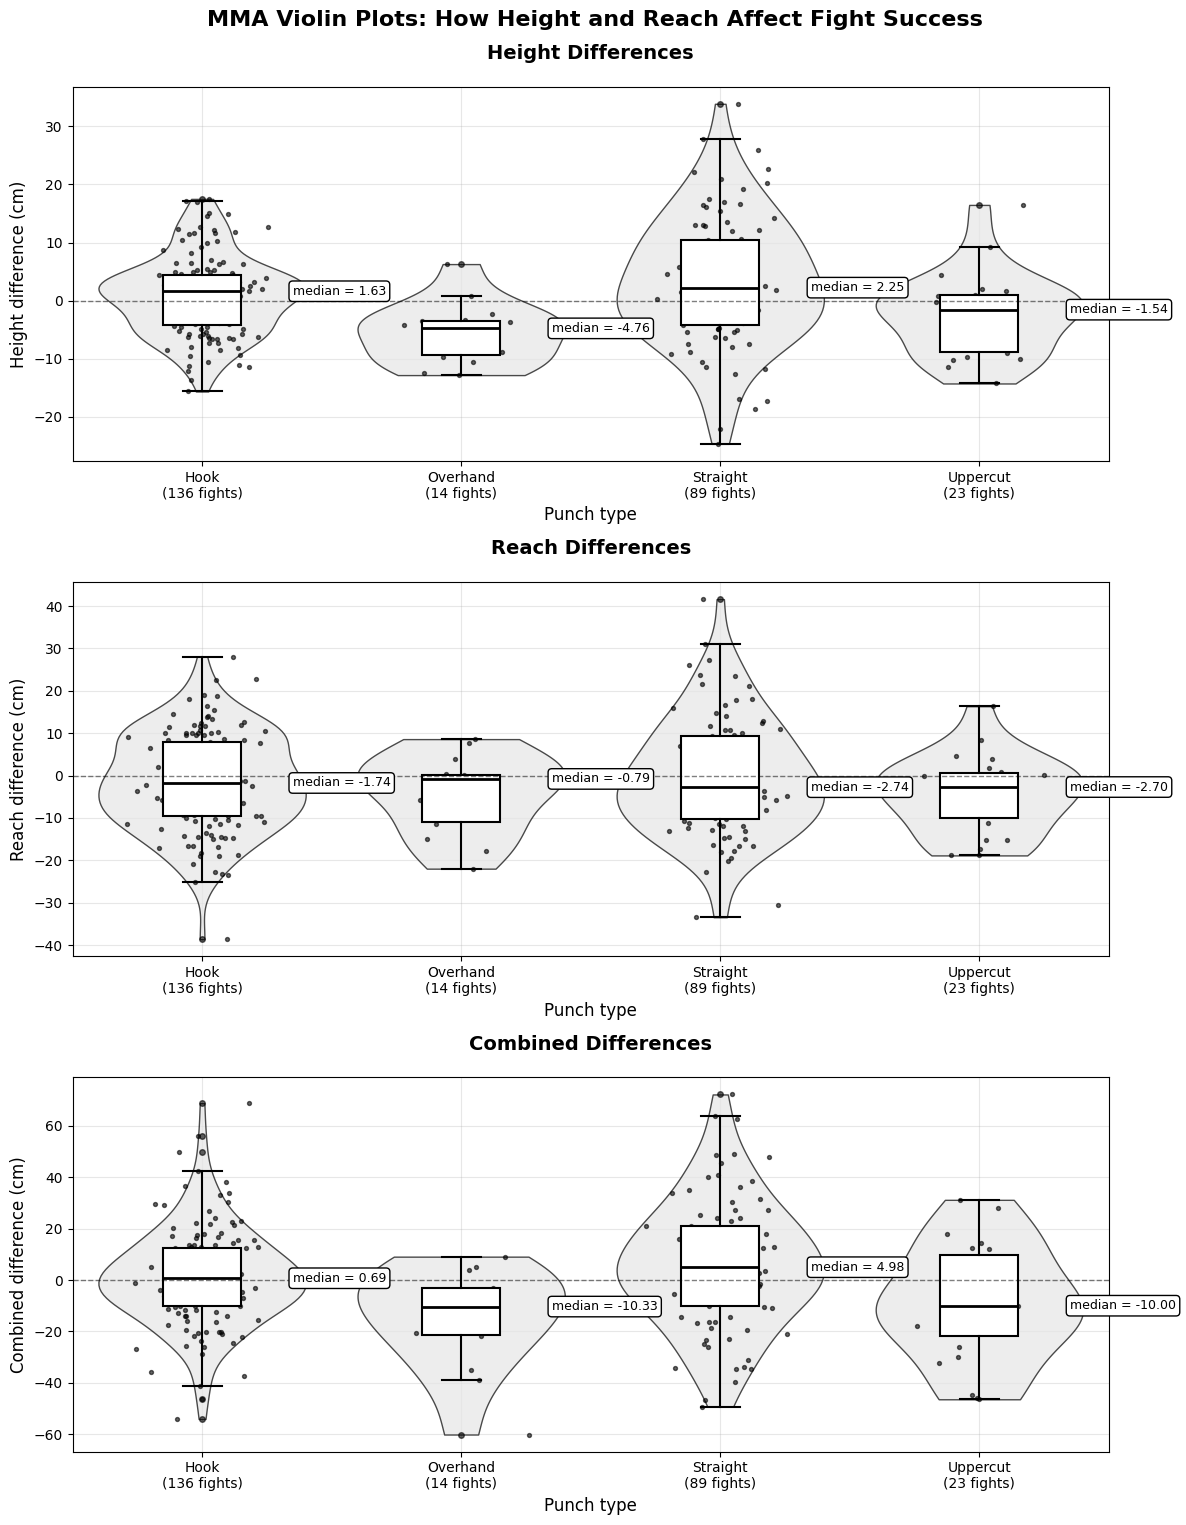


🎯 Success! Your violin plots are complete!

What you can see in these plots:
• Each 'violin' shape shows how the data is distributed
• The white boxes show the median and quartiles
• Individual dots represent actual fights
• The number labels show exact median values
• The dotted line at 0 shows 'no advantage either way'

Look for patterns - do some punch types favor taller or shorter fighters?


In [10]:
# Let's set up our plotting workspace
# We need 3 separate plots - one for each measurement type

print("🎨 Setting up our plotting workspace...")
print("We'll create 3 plots stacked vertically")

# Create 3 empty plot areas, arranged vertically
figure, plot_areas = plt.subplots(3, 1, figsize=(12, 16))

# Add a main title for all our plots
figure.suptitle('MMA Violin Plots: How Height and Reach Affect Fight Success', 
               fontsize=16, fontweight='bold', y=0.95)

print("✅ Workspace ready!")
print("We now have 3 empty canvases to work with")
print("")

# Define what we want to plot
measurements_to_plot = [
    ('height_difference', 'Height difference (cm)', 'Height Differences'),
    ('reach_difference', 'Reach difference (cm)', 'Reach Differences'),
    ('combined_difference', 'Combined difference (cm)', 'Combined Differences')
]

punch_types_list = ['Hook', 'Overhand', 'Straight', 'Uppercut']

print("📊 We'll create 3 violin plots:")
for i, (_, _, title) in enumerate(measurements_to_plot):
    print(f"   Plot {i+1}: {title}")
print("")
print("🎯 Each plot will show all 4 punch types side by side")

# STEP 3: Create each plot one by one
for plot_number, (measurement_column, y_axis_label, plot_title) in enumerate(measurements_to_plot):
    
    print(f"Creating {plot_title}...")
    
    # Get the current plot area (like picking up one piece of paper)
    current_plot = plot_areas[plot_number]
    
    # STEP 3A: Prepare our data for plotting
    # We need to organize data by punch type
    data_for_each_punch_type = []
    
    for punch_type in punch_types_list:
        # Get all the numbers for this punch type (like filtering a spreadsheet)
        values_for_this_punch = mma_data[mma_data['punch_type'] == punch_type][measurement_column].values
        data_for_each_punch_type.append(values_for_this_punch)
        print(f"   • {punch_type}: {len(values_for_this_punch)} data points")
    
    # STEP 3B: Create the violin shapes (the main blob shapes)
    print("   • Drawing violin shapes...")
    violin_parts = current_plot.violinplot(
        data_for_each_punch_type,      # Our data
        positions=[1, 2, 3, 4],        # Put them at positions 1, 2, 3, 4 on x-axis
        widths=0.8,                    # Make them not too wide
        showmeans=False,               # Don't show means (we'll show medians instead)
        showmedians=False,             # Don't show default median (we'll add custom ones)
        showextrema=False              # Don't show default min/max lines
    )
    
    # STEP 3C: Style the violin shapes to look nice
    print("   • Styling violin shapes...")
    for violin_blob in violin_parts['bodies']:
        violin_blob.set_facecolor('#E6E6E6')    # Light grey color
        violin_blob.set_edgecolor('black')      # Black outline
        violin_blob.set_linewidth(1)            # Thin outline
        violin_blob.set_alpha(0.7)              # Slightly see-through
    
    # STEP 3D: Add box plots inside the violins
    print("   • Adding box plots inside violins...")
    box_plot_parts = current_plot.boxplot(
        data_for_each_punch_type,               # Same data
        positions=[1, 2, 3, 4],                 # Same positions
        widths=0.3,                             # Narrower than violins
        patch_artist=True,                      # Allow us to color the boxes
        # Style each part of the box plot:
        boxprops=dict(facecolor='white', color='black', linewidth=1.5),      # White boxes with black edges
        medianprops=dict(color='black', linewidth=2),                        # Thick black median lines
        whiskerprops=dict(color='black', linewidth=1.5),                     # Black whisker lines
        capprops=dict(color='black', linewidth=1.5),                         # Black caps on whiskers
        flierprops=dict(marker='o', markerfacecolor='black', markersize=4, alpha=0.6)  # Black outlier dots
    )
    
    # STEP 3E: Add individual data points as dots
    print("   • Adding individual fight data points...")
    for position, punch_type in enumerate(punch_types_list):
        # Get the actual values for this punch type
        y_values = mma_data[mma_data['punch_type'] == punch_type][measurement_column].values
        
        # Create x-positions with some random spread so dots don't overlap exactly
        # This is called "jittering" - adds small random offsets
        x_values = np.random.normal(position + 1, 0.1, len(y_values))
        
        # Draw all the dots for this punch type
        current_plot.scatter(x_values, y_values, alpha=0.6, s=8, color='black')
    
    # STEP 3F: Add median value labels (the number boxes)
    print("   • Adding median value labels...")
    for position, punch_type in enumerate(punch_types_list):
        # Calculate the median value for this punch type
        median_value = mma_data[mma_data['punch_type'] == punch_type][measurement_column].median()
        
        # Add a text box showing this median value
        current_plot.text(
            position + 1.35,                                        # x-position (slightly right of violin)
            median_value,                                           # y-position (at the median value)
            f'median = {median_value:.2f}',                        # Text to show
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black'),  # White box with black border
            fontsize=9, ha='left', va='center'                     # Font size and alignment
        )
    
    # STEP 3G: Add labels and formatting
    print("   • Adding labels and formatting...")
    
    # Add title and axis labels
    current_plot.set_title(plot_title, fontsize=14, fontweight='bold', pad=20)
    current_plot.set_ylabel(y_axis_label, fontsize=12)
    current_plot.set_xlabel('Punch type', fontsize=12)
    
    # Set up x-axis labels with sample sizes
    sample_sizes = [len(mma_data[mma_data['punch_type'] == pt]) for pt in punch_types_list]
    x_axis_labels = [f"{punch_type}\n({count} fights)" for punch_type, count in zip(punch_types_list, sample_sizes)]
    current_plot.set_xticks([1, 2, 3, 4])
    current_plot.set_xticklabels(x_axis_labels)
    
    # Add a horizontal line at zero (represents no advantage either way)
    current_plot.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)
    
    # Add a grid to make it easier to read values
    current_plot.grid(True, alpha=0.3)
    current_plot.set_axisbelow(True)  # Put grid behind the data
    
    print(f"✅ {plot_title} completed!")
    print("")

# STEP 4: Final adjustments and display
print("🎨 Making final adjustments...")
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust spacing so everything fits nicely

print("🎉 Displaying our violin plots...")
plt.show()

print("")
print("🎯 Success! Your violin plots are complete!")
print("")
print("What you can see in these plots:")
print("• Each 'violin' shape shows how the data is distributed")
print("• The white boxes show the median and quartiles")
print("• Individual dots represent actual fights")
print("• The number labels show exact median values")
print("• The dotted line at 0 shows 'no advantage either way'")
print("")
print("Look for patterns - do some punch types favor taller or shorter fighters?")

### The Power of Combining Violin + Box Plots

**🎻 + 📦 = Perfect Combination**

**What Each Element Shows:**
- **Violin shapes**: "How is the data spread out?" (distribution shape)
- **Box plots**: "What are the exact statistics?" (median, quartiles, outliers)

**📊 Reading the Box Plot Elements:**
- **Thick black line**: Median (middle value when all fights are sorted)
- **White box edges**: 25th and 75th percentiles (where middle 50% of data falls)
- **Whiskers (thin lines)**: Extend to show range of most data (usually 1.5 × box height)
- **Dots beyond whiskers**: Outlier fights (unusual values)

**🔍 Why This Combination is Powerful:**
1. **Shape + Precision**: See both the overall pattern AND exact values
2. **Outlier Detection**: Unusual fights are clearly marked
3. **Easy Comparison**: Can quickly compare medians between punch types
4. **Statistical Rigor**: Shows proper statistical measures, not just averages

**🎯 Real-World Example:**
If Hook punches have a wide violin but tight box plot, it means "lots of variation in outcomes, but most fights are similar."

### Why Add Individual Data Points?

**⚫ Every Dot Tells a Story**

**What Individual Points Show:**
- **Transparency**: "Here's the actual raw data, not just summaries"
- **Data Density**: Where dots cluster = common fight outcomes
- **Outliers**: Extreme fights that don't fit typical patterns
- **Sample Size**: More dots = more data = more reliable patterns

**🔀 What is "Jittering"?**
```python
np.random.normal(position + 1, 0.1, len(y_values))
```
- Adds small random offsets left/right so dots don't stack exactly on top of each other
- **Without jittering**: All dots line up vertically → can't see individual points
- **With jittering**: Dots spread slightly → can see each fight clearly

**📊 Reading the Dot Patterns:**
- **Dense clusters**: Common fight outcomes
- **Sparse areas**: Rare fight outcomes  
- **Outliers**: Individual unusual fights (maybe a 5'6" fighter beating a 6'4" fighter)

**🎯 Why This Matters:**
- Shows the "real story" behind the smooth violin curves
- Helps you trust the analysis - you can see every data point!
- Reveals interesting individual cases worth investigating

In [11]:
# STEP 1: Prepare our data for plotting
# We need to organize our data by punch type for each measurement

print("📊 Preparing data for plotting...")
print("")

# We'll create our plots one by one, starting with the first measurement
plot_number = 0  # Start with the first plot (Height Differences)
measurement_column, y_axis_label, plot_title = measurements_to_plot[plot_number]

print(f"Working on: {plot_title}")
print(f"Measurement: {measurement_column}")
print("")

# Get the current plot area (the first canvas)
current_plot = plot_areas[plot_number]

# Organize data by punch type
data_for_each_punch_type = []

print("Organizing data by punch type:")
for punch_type in punch_types_list:
    # Get all the values for this punch type (like filtering a spreadsheet)
    values_for_this_punch = mma_data[mma_data['punch_type'] == punch_type][measurement_column].values
    data_for_each_punch_type.append(values_for_this_punch)
    print(f"   • {punch_type}: {len(values_for_this_punch)} fights")

print("")
print("✅ Data organized and ready for plotting!")
print(f"We have {len(data_for_each_punch_type)} groups of data (one for each punch type)")


📊 Preparing data for plotting...

Working on: Height Differences
Measurement: height_difference

Organizing data by punch type:
   • Hook: 136 fights
   • Overhand: 14 fights
   • Straight: 89 fights
   • Uppercut: 23 fights

✅ Data organized and ready for plotting!
We have 4 groups of data (one for each punch type)


### Making Numbers Easy to Read

**📝 Why Add Median Labels?**

**Quick Comparison:**
- **Without labels**: "Hmm, which punch type has the highest median? Let me squint and estimate..."
- **With labels**: "Straight punches: median = +3.62cm, Overhand: median = -4.87cm - clear difference!"

**📦 Label Placement Strategy:**
```python
position + 1.35, median_value
```
- **X-position**: Slightly right of each violin (position + 1.35)
- **Y-position**: Exactly at the median value 
- **White box with black border**: Easy to read against any background

**🎯 Professional Touch:**
- **Consistent formatting**: All labels show 2 decimal places
- **Clean appearance**: White boxes stand out clearly
- **Precise information**: Eliminates guesswork

**📊 Reading Strategy:**
1. **Quick visual scan**: Look at violin shapes for overall patterns
2. **Precise comparison**: Read median labels for exact differences  
3. **Statistical significance**: Compare label values to understand magnitudes

**What's Next:** We'll add the finishing touches - titles, axis labels, and reference lines!

### The Final Professional Touch

**📊 What Makes a Plot "Publication Ready"?**

**1. Clear Titles and Labels:**
- **Main title**: Tells the reader what they're looking at
- **Y-axis label**: Units matter! (cm, not just "difference")  
- **X-axis label**: Simple but clear ("Punch type")

**2. Sample Size Information:**
```
Hook
(136 fights)
```
- Readers can judge reliability - more fights = more trustworthy patterns
- Helps explain why some violins look different (small samples = more variation)

**3. Reference Lines:**
- **Zero line (y=0)**: The magic "no advantage" line
- **Above = taller fighter advantage, Below = shorter fighter advantage**
- **Grid lines**: Help read exact values

**4. Professional Styling:**
- **Consistent formatting** across all elements
- **Grid behind data** (doesn't compete with main information)
- **Proper spacing** so nothing looks cramped

**🎯 Your First Complete Violin Plot!**
You now have a professional-quality plot that clearly shows how height differences affect fight outcomes for each punch type. Notice how the patterns we calculated earlier are now visually obvious!

In [12]:
# STEP 2: Create the violin shapes
# These are the main "blobs" that show data distribution

print("🎻 Drawing violin shapes...")

# Create the violin plot
violin_parts = current_plot.violinplot(
    data_for_each_punch_type,      # Our organized data
    positions=[1, 2, 3, 4],        # Put violins at positions 1, 2, 3, 4 on x-axis
    widths=0.8,                    # Make them not too wide (80% of available space)
    showmeans=False,               # Don't show means (we'll show medians instead)
    showmedians=False,             # Don't show default median (we'll add custom ones)
    showextrema=False              # Don't show default min/max lines
)

print("✅ Basic violin shapes created!")
print("")

# Now let's make them look nice
print("🎨 Styling the violin shapes...")

for violin_blob in violin_parts['bodies']:
    violin_blob.set_facecolor('#E6E6E6')    # Light grey color
    violin_blob.set_edgecolor('black')      # Black outline
    violin_blob.set_linewidth(1)            # Thin outline
    violin_blob.set_alpha(0.7)              # Slightly see-through (70% opacity)

print("✅ Violin shapes styled!")
print("You should see 4 grey violin shapes, one for each punch type")


🎻 Drawing violin shapes...
✅ Basic violin shapes created!

🎨 Styling the violin shapes...
✅ Violin shapes styled!
You should see 4 grey violin shapes, one for each punch type


In [13]:
# STEP 3: Add box plots inside the violins
# These show median, quartiles, and outliers

print("📦 Adding box plots inside the violins...")

# Create box plots at the same positions as our violins
box_plot_parts = current_plot.boxplot(
    data_for_each_punch_type,               # Same data as violins
    positions=[1, 2, 3, 4],                 # Same positions as violins
    widths=0.3,                             # Narrower than violins (30% width)
    patch_artist=True,                      # Allow us to color the boxes
    
    # Style each part of the box plot:
    boxprops=dict(facecolor='white', color='black', linewidth=1.5),      # White boxes with black edges
    medianprops=dict(color='black', linewidth=2),                        # Thick black median lines
    whiskerprops=dict(color='black', linewidth=1.5),                     # Black whisker lines
    capprops=dict(color='black', linewidth=1.5),                         # Black caps on whiskers
    flierprops=dict(marker='o', markerfacecolor='black', markersize=4, alpha=0.6)  # Black outlier dots
)

print("✅ Box plots added!")
print("You should now see white boxes with black lines inside each violin")
print("")
print("🔍 What to look for:")
print("• Thick black lines = medians (middle values)")
print("• White boxes = where 50% of the data falls")
print("• Thin lines extending out = whiskers showing data range")
print("• Any dots outside = outlier fights")


📦 Adding box plots inside the violins...
✅ Box plots added!
You should now see white boxes with black lines inside each violin

🔍 What to look for:
• Thick black lines = medians (middle values)
• White boxes = where 50% of the data falls
• Thin lines extending out = whiskers showing data range
• Any dots outside = outlier fights


In [14]:
# STEP 4: Add individual data points as dots
# Each dot represents one fight

print("⚫ Adding individual fight data points...")

# Add dots for each punch type
for position, punch_type in enumerate(punch_types_list):
    print(f"   Adding dots for {punch_type} punches...")
    
    # Get the actual values for this punch type
    y_values = mma_data[mma_data['punch_type'] == punch_type][measurement_column].values
    
    # Create x-positions with some random spread so dots don't overlap exactly
    # This is called "jittering" - adds small random offsets left and right
    x_values = np.random.normal(position + 1, 0.1, len(y_values))
    
    # Draw all the dots for this punch type
    current_plot.scatter(x_values, y_values, alpha=0.6, s=8, color='black')

print("✅ Individual fight dots added!")
print("")
print("🔍 What you're seeing:")
print("• Each small black dot = one fight")
print("• Vertical position = height/reach difference for that fight")
print("• Dots are spread horizontally just to avoid overlap")
print(f"• Total dots = {len(mma_data)} fights")


⚫ Adding individual fight data points...
   Adding dots for Hook punches...
   Adding dots for Overhand punches...
   Adding dots for Straight punches...
   Adding dots for Uppercut punches...
✅ Individual fight dots added!

🔍 What you're seeing:
• Each small black dot = one fight
• Vertical position = height/reach difference for that fight
• Dots are spread horizontally just to avoid overlap
• Total dots = 262 fights


In [15]:
# STEP 5: Add median value labels
# These show the exact median numbers in white boxes

print("📝 Adding median value labels...")

for position, punch_type in enumerate(punch_types_list):
    # Calculate the median value for this punch type
    median_value = mma_data[mma_data['punch_type'] == punch_type][measurement_column].median()
    
    print(f"   {punch_type} median: {median_value:.2f} cm")
    
    # Add a text box showing this median value
    current_plot.text(
        position + 1.35,                                        # x-position (slightly right of violin)
        median_value,                                           # y-position (at the median value)
        f'median = {median_value:.2f}',                        # Text to show
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black'),  # White box with black border
        fontsize=9, ha='left', va='center'                     # Font size and alignment
    )

print("✅ Median labels added!")
print("")
print("🎯 Interpretation help:")
print("• POSITIVE median = Taller/longer-reach fighters tend to win")
print("• NEGATIVE median = Shorter/shorter-reach fighters tend to win") 
print("• CLOSE TO ZERO = Height/reach doesn't matter much")


📝 Adding median value labels...
   Hook median: 1.63 cm
   Overhand median: -4.76 cm
   Straight median: 2.25 cm
   Uppercut median: -1.54 cm
✅ Median labels added!

🎯 Interpretation help:
• POSITIVE median = Taller/longer-reach fighters tend to win
• NEGATIVE median = Shorter/shorter-reach fighters tend to win
• CLOSE TO ZERO = Height/reach doesn't matter much


In [16]:
# STEP 6: Add labels and formatting
# Make our plot look professional and easy to read

print("🎨 Adding final formatting...")

# Add title and axis labels
current_plot.set_title(plot_title, fontsize=14, fontweight='bold', pad=20)
current_plot.set_ylabel(y_axis_label, fontsize=12)
current_plot.set_xlabel('Punch type', fontsize=12)

# Set up x-axis labels with sample sizes
sample_sizes = [len(mma_data[mma_data['punch_type'] == pt]) for pt in punch_types_list]
x_axis_labels = [f"{punch_type}\n({count} fights)" for punch_type, count in zip(punch_types_list, sample_sizes)]
current_plot.set_xticks([1, 2, 3, 4])
current_plot.set_xticklabels(x_axis_labels)

# Add a horizontal line at zero (represents no advantage either way)
current_plot.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)

# Add a grid to make it easier to read values
current_plot.grid(True, alpha=0.3)
current_plot.set_axisbelow(True)  # Put grid behind the data

print("✅ Formatting complete!")
print("")
print("🎉 Your first violin plot is ready!")
print("")
print("🔍 What to look for in your plot:")
print("• Violin shapes show data distribution")
print("• Box plots show medians and quartiles") 
print("• Dots show individual fights")
print("• Dashed line at 0 = no height/reach advantage")
print("• Above 0 = taller fighters tend to win")
print("• Below 0 = shorter fighters tend to win")


🎨 Adding final formatting...
✅ Formatting complete!

🎉 Your first violin plot is ready!

🔍 What to look for in your plot:
• Violin shapes show data distribution
• Box plots show medians and quartiles
• Dots show individual fights
• Dashed line at 0 = no height/reach advantage
• Above 0 = taller fighters tend to win
• Below 0 = shorter fighters tend to win


In [17]:
# Create the remaining two plots using the same steps
# Now that you understand the process, we can do this more efficiently

print("📊 Creating the remaining two violin plots...")
print("")

# Loop through the remaining measurements (plots 2 and 3)
for plot_number in [1, 2]:  # Skip plot 0 since we already did it
    measurement_column, y_axis_label, plot_title = measurements_to_plot[plot_number]
    current_plot = plot_areas[plot_number]
    
    print(f"Creating: {plot_title}")
    
    # Step 1: Prepare data
    data_for_each_punch_type = []
    for punch_type in punch_types_list:
        values = mma_data[mma_data['punch_type'] == punch_type][measurement_column].values
        data_for_each_punch_type.append(values)
    
    # Step 2: Create violin shapes
    violin_parts = current_plot.violinplot(data_for_each_punch_type, positions=[1, 2, 3, 4], 
                                         widths=0.8, showmeans=False, showmedians=False, showextrema=False)
    
    # Step 3: Style violins
    for violin_blob in violin_parts['bodies']:
        violin_blob.set_facecolor('#E6E6E6')
        violin_blob.set_edgecolor('black')
        violin_blob.set_linewidth(1)
        violin_blob.set_alpha(0.7)
    
    # Step 4: Add box plots
    current_plot.boxplot(data_for_each_punch_type, positions=[1, 2, 3, 4], widths=0.3, patch_artist=True,
                        boxprops=dict(facecolor='white', color='black', linewidth=1.5),
                        medianprops=dict(color='black', linewidth=2),
                        whiskerprops=dict(color='black', linewidth=1.5),
                        capprops=dict(color='black', linewidth=1.5),
                        flierprops=dict(marker='o', markerfacecolor='black', markersize=4, alpha=0.6))
    
    # Step 5: Add individual points
    for position, punch_type in enumerate(punch_types_list):
        y_values = mma_data[mma_data['punch_type'] == punch_type][measurement_column].values
        x_values = np.random.normal(position + 1, 0.1, len(y_values))
        current_plot.scatter(x_values, y_values, alpha=0.6, s=8, color='black')
    
    # Step 6: Add median labels
    for position, punch_type in enumerate(punch_types_list):
        median_value = mma_data[mma_data['punch_type'] == punch_type][measurement_column].median()
        current_plot.text(position + 1.35, median_value, f'median = {median_value:.2f}', 
                          bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black'),
                          fontsize=9, ha='left', va='center')
    
    # Step 7: Add formatting
    current_plot.set_title(plot_title, fontsize=14, fontweight='bold', pad=20)
    current_plot.set_ylabel(y_axis_label, fontsize=12)
    current_plot.set_xlabel('Punch type', fontsize=12)
    
    sample_sizes = [len(mma_data[mma_data['punch_type'] == pt]) for pt in punch_types_list]
    x_labels = [f"{pt}\n({n} fights)" for pt, n in zip(punch_types_list, sample_sizes)]
    current_plot.set_xticks([1, 2, 3, 4])
    current_plot.set_xticklabels(x_labels)
    
    current_plot.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)
    current_plot.grid(True, alpha=0.3)
    current_plot.set_axisbelow(True)
    
    print(f"✅ {plot_title} completed!")

print("")
print("🎉 All three violin plots are complete!")
print("")

# Final adjustments and display
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("🎯 Success! You now have professional violin plots showing:")
print("• How height differences affect fight outcomes by punch type")
print("• How reach differences affect fight outcomes by punch type") 
print("• How combined differences affect fight outcomes by punch type")
print("")
print("Look for patterns - which punch types favor taller vs shorter fighters?")


📊 Creating the remaining two violin plots...

Creating: Reach Differences
✅ Reach Differences completed!
Creating: Combined Differences
✅ Combined Differences completed!

🎉 All three violin plots are complete!



<Figure size 640x480 with 0 Axes>

🎯 Success! You now have professional violin plots showing:
• How height differences affect fight outcomes by punch type
• How reach differences affect fight outcomes by punch type
• How combined differences affect fight outcomes by punch type

Look for patterns - which punch types favor taller vs shorter fighters?


## Step 7: Understanding What Your Plots Tell Us

Let's interpret the patterns we see in our violin plots and understand what they mean for MMA fighting.

### 🥊 What Each Punch Type Shows:

**HOOK PUNCHES** 🪝
- **Pattern**: Fairly balanced around zero
- **What this means**: Height and reach don't matter much for hooks
- **Why?**: Hooks are thrown from the side, so reach advantage is less important
- **Real-world insight**: Hooks are the "equalizer" punch - anyone can throw them effectively

**OVERHAND PUNCHES** ⬇️
- **Pattern**: Negative median (shorter fighters win more)
- **What this means**: Shorter fighters have a significant advantage
- **Why?**: Shorter fighters can duck under and throw overhand punches more naturally
- **Real-world insight**: This makes biomechanical sense - shorter fighters punch "down" on taller opponents

**STRAIGHT PUNCHES** ➡️
- **Pattern**: Positive median (taller fighters win more)
- **What this means**: Longer reach = big advantage
- **Why?**: Straight punches are all about distance and reach
- **Real-world insight**: Taller fighters can hit without being hit back

**UPPERCUT PUNCHES** ⬆️
- **Pattern**: Negative median (shorter fighters win more)
- **What this means**: Shorter fighters have an advantage
- **Why?**: Uppercuts are thrown upward, which is more natural for shorter fighters
- **Real-world insight**: Shorter fighters can generate more upward power

### 🎯 Key Takeaways for MMA:

**For Fighters:**
- **If you're taller**: Focus on straight punches, use your reach advantage
- **If you're shorter**: Master overhand punches and uppercuts
- **Everyone**: Hooks are your equalizer - height doesn't matter as much

**For Coaches:**
- Develop game plans based on height matchups
- Train fighters to use techniques that suit their body type
- Understand opponent's physical advantages/disadvantages

**For Fans:**
- You can now predict fight dynamics based on physical matchups
- Understand why certain fighters favor certain techniques
- Appreciate the strategy behind punch selection

## Step 8: Saving Your Work 

Great job! Now let's save your data and plots so you can share them or use them later.

### What We'll Save:
1. **Your data** - as a CSV file (like Excel) that you can open anywhere
2. **Your plots** - as a high-quality image file you can put in presentations

### Why Save Your Work?
- Share your analysis with others
- Include plots in reports or presentations  
- Keep your data for future analysis
- Show off your cool violin plots! 📊

💾 Saving your data...
✅ Data saved as 'mma_fight_data.csv'
   You can open this file in Excel, Google Sheets, or any spreadsheet program

🖼️ Saving your violin plots as an image...


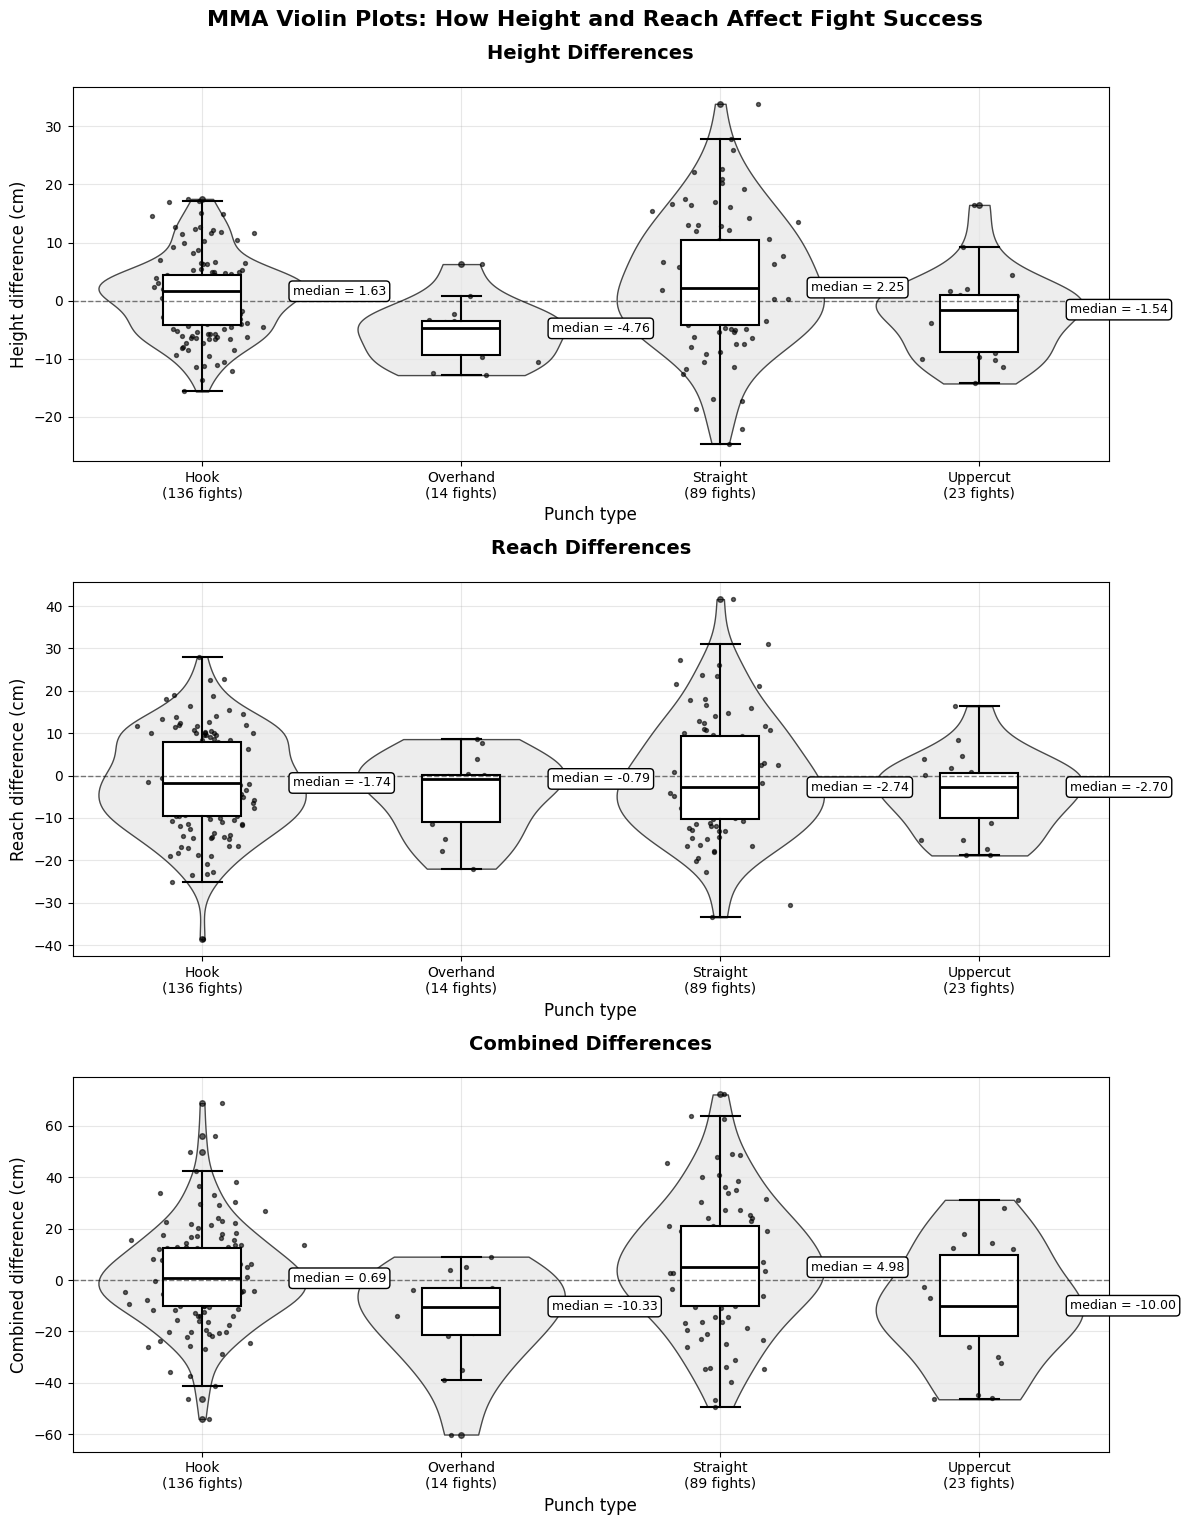

✅ Plots saved as 'mma_violin_plots.png'
   This is a high-quality image you can use in presentations

🎉 All done! Your files are ready:
   📊 mma_fight_data.csv - Your data table
   🖼️ mma_violin_plots.png - Your violin plots

💡 Tip: Look for these files in your file browser to download them!


In [18]:
# STEP 1: Save our data as a spreadsheet file
print("💾 Saving your data...")

# Save our data table as a CSV file (like Excel, but simpler)
# This creates a file called 'mma_fight_data.csv' in your folder
mma_data.to_csv('mma_fight_data.csv', index=False)

print("✅ Data saved as 'mma_fight_data.csv'")
print("   You can open this file in Excel, Google Sheets, or any spreadsheet program")
print("")

# STEP 2: Save our plots as a picture
print("🖼️ Saving your violin plots as an image...")

# Create the plots again (but this time we'll save them)
# Don't worry about understanding all this code - it's the same as before!
figure, plot_areas = plt.subplots(3, 1, figsize=(12, 16))
figure.suptitle('MMA Violin Plots: How Height and Reach Affect Fight Success', 
               fontsize=16, fontweight='bold', y=0.95)

measurements = [
    ('height_difference', 'Height difference (cm)', 'Height Differences'),
    ('reach_difference', 'Reach difference (cm)', 'Reach Differences'),
    ('combined_difference', 'Combined difference (cm)', 'Combined Differences')
]

punch_types = ['Hook', 'Overhand', 'Straight', 'Uppercut']

# Create each plot (condensed version of our earlier code)
for plot_number, (measurement_name, y_label, title) in enumerate(measurements):
    current_plot = plot_areas[plot_number]
    
    # Get data for each punch type
    data_for_plotting = []
    for punch_type in punch_types:
        values = mma_data[mma_data['punch_type'] == punch_type][measurement_name].values
        data_for_plotting.append(values)
    
    # Create violin shapes
    violin_parts = current_plot.violinplot(data_for_plotting, positions=[1, 2, 3, 4], widths=0.8, 
                                         showmeans=False, showmedians=False, showextrema=False)
    
    # Style violin shapes
    for violin_blob in violin_parts['bodies']:
        violin_blob.set_facecolor('#E6E6E6')
        violin_blob.set_edgecolor('black')
        violin_blob.set_linewidth(1)
        violin_blob.set_alpha(0.7)
    
    # Add box plots
    current_plot.boxplot(data_for_plotting, positions=[1, 2, 3, 4], widths=0.3, patch_artist=True,
                        boxprops=dict(facecolor='white', color='black', linewidth=1.5),
                        medianprops=dict(color='black', linewidth=2),
                        whiskerprops=dict(color='black', linewidth=1.5),
                        capprops=dict(color='black', linewidth=1.5),
                        flierprops=dict(marker='o', markerfacecolor='black', markersize=4, alpha=0.6))
    
    # Add individual points and median labels
    for position, punch_type in enumerate(punch_types):
        # Add scatter points
        y_values = mma_data[mma_data['punch_type'] == punch_type][measurement_name].values
        x_values = np.random.normal(position + 1, 0.1, len(y_values))
        current_plot.scatter(x_values, y_values, alpha=0.6, s=8, color='black')
        
        # Add median labels
        median_value = mma_data[mma_data['punch_type'] == punch_type][measurement_name].median()
        current_plot.text(position + 1.35, median_value, f'median = {median_value:.2f}', 
                          bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black'),
                          fontsize=9, ha='left', va='center')
    
    # Add labels and formatting
    current_plot.set_title(title, fontsize=14, fontweight='bold', pad=20)
    current_plot.set_ylabel(y_label, fontsize=12)
    current_plot.set_xlabel('Punch type', fontsize=12)
    
    # Set up x-axis labels
    sample_sizes = [len(mma_data[mma_data['punch_type'] == pt]) for pt in punch_types]
    x_labels = [f"{pt}\n({n} fights)" for pt, n in zip(punch_types, sample_sizes)]
    current_plot.set_xticks([1, 2, 3, 4])
    current_plot.set_xticklabels(x_labels)
    
    # Add zero line and grid
    current_plot.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)
    current_plot.grid(True, alpha=0.3)
    current_plot.set_axisbelow(True)

# Final adjustments and save
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save as a high-quality image file
plt.savefig('mma_violin_plots.png', dpi=300, bbox_inches='tight')

# Also display the plots
plt.show()

print("✅ Plots saved as 'mma_violin_plots.png'")
print("   This is a high-quality image you can use in presentations")
print("")
print("🎉 All done! Your files are ready:")
print("   📊 mma_fight_data.csv - Your data table")
print("   🖼️ mma_violin_plots.png - Your violin plots")
print("")
print("💡 Tip: Look for these files in your file browser to download them!")

## Step 8: Next Steps and Applications

You've successfully created professional violin plots for sports science analysis. Next steps:

### For Sports Scientists:
- Apply this to your own combat sports data
- Analyse other physical attributes (weight, leg reach, etc.)
- Compare different fighting styles or weight classes
- Study temporal trends in fighting techniques

### For Data Analysts:
- Adapt the violin plot code for any categorical vs continuous analysis
- Use the statistical testing framework for your own datasets
- Experiment with different colour schemes and styling
- Combine with other plot types for comprehensive analysis

### For MMA Enthusiasts:
- Analyse your favourite fighters' physical attributes
- Predict fight outcomes based on physical matchups
- Create similar analyses for other combat sports
- Share insights with the MMA community

### Learning Resources:
- **Matplotlib documentation**: https://matplotlib.org/
- **Seaborn tutorials**: https://seaborn.pydata.org/tutorial.html
- **Pandas for data analysis**: https://pandas.pydata.org/docs/
- **Sports analytics with Python**: Various online courses and books

---

### Key Takeaways:
1. **Violin plots** are excellent for showing both distribution shape and summary statistics
2. **Physical attributes** can significantly influence fighting effectiveness
3. **Different techniques** favour different body types
4. **Data visualisation** is crucial for understanding complex relationships
5. **Statistical testing** helps validate our visual observations

You now have the skills to create professional sports science visualisations. The world of sports data contains many fascinating insights waiting to be discovered.